In [1]:
# Installing Astroquery
!pip install astroquery

In [2]:
# import necesssary libraries
import matplotlib.pyplot as plt

### Query for Astronomical Survey Images centered on target name
SkyView Query Form:- https://skyview.gsfc.nasa.gov/current/cgi/query.pl

In [3]:
from astroquery.skyview import SkyView

### Getting the Andromeda galaxy data (M31) from SDSSg and DSS2 Blue surveys using Skyview

In [4]:
hdu = SkyView.get_images("M31", "SDSSg")[0][0]
'''
M31 = Position
SDSSg = Survey
'''

'\nM31 = Position\nSDSSg = Survey\n'

In [5]:
# Getting into the data
M31_header = hdu.header
M31_header

SIMPLE  =                    T / Written by SkyView Sun Jan 28 03:11:00 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [6]:
# Getting the pixels data from hdu
M31_Pixels = hdu.data
print(type(M31_Pixels))
print(M31_Pixels.shape)

<class 'numpy.ndarray'>
(300, 300)


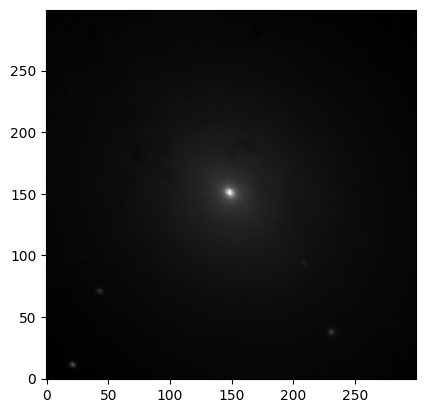

In [7]:
# Plotting the image
plt.imshow(M31_Pixels,
           cmap = 'gray',
           origin = 'lower')

In [8]:
import astropy.units as u

In [9]:
# Changing the survey to DSS2 Blue
hdu2 = SkyView.get_images("M31",
                         "DSS2 Blue",
                          pixels = 600,
                          radius = 150*u.arcmin)[0][0]

In [10]:
M31_DSS2_Blue_Pixels = hdu2.data
print(M31_DSS2_Blue_Pixels.shape)

(600, 600)


In [11]:
plt.imshow(M31_DSS2_Blue_Pixels,
           cmap = 'gray',
           origin = 'lower')

### Creating our own FITS file

In [12]:
# We'll be using the same Header and Data we had in the Andromeda Galaxy

from astropy.io import fits

In [13]:
hdulist = fits.HDUList() # HDU list to store different HDUs
hdu1 = fits.PrimaryHDU() # Primary HDU

# adding the pixels data
hdu1.data = M31_Pixels

# adding the metadata
hdu1.header = M31_header

# appending the primary hdu to the hdu list
hdulist.append(hdu1)

hdulist.writeto('Dummy_FITS_file.fits')

In [14]:
# opening the fits file we generated above
my_fits = fits.open('/content/Dummy_FITS_file.fits')

In [15]:
my_fits

In [16]:
my_fits[0] # inside the first index of our fits data

In [17]:
my_fits[0].header

SIMPLE  =                    T / Written by SkyView Sun Jan 28 03:11:00 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [18]:
my_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [19]:
my_fits[0].data.shape

(300, 300)

### Pixel Scaling on M31 Data

In [20]:
import numpy as np

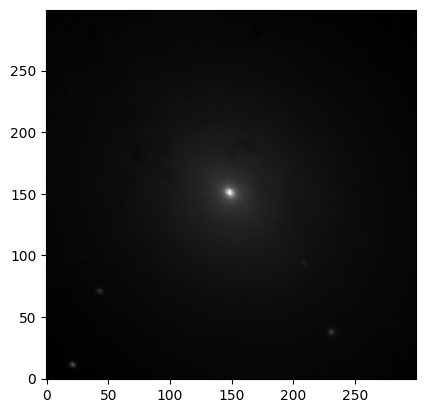

In [21]:
plt.imshow(M31_Pixels,
           cmap = 'gray',
           origin = 'lower')

In [22]:
# printing the values of pixels at the center of the Andromeda Galaxy
M31_Pixels[150,150]

148.5

In [23]:
print('Summary statistics of M31 Pixels: ')
print(f"Minimun: {np.min(M31_Pixels)}")
print(f"Maximum: {np.max(M31_Pixels)}")
print(f"Average: {np.mean(M31_Pixels)}")
print(f"Std: {np.std(M31_Pixels)}")
# as we can see the mean in skewed towards the left side

Summary statistics of M31 Pixels: 
Minimun: 5.359375
Maximum: 178.0
Average: 13.329444885253906
Std: 6.3922271728515625


In [24]:
# getting the histogram distribution
plt.hist(M31_Pixels.flat,
         bins = 300)
plt.show()

# as we can see the pixel distribution is skewed towards the left hand side

###  MinMax Pixel Scaling

In [25]:
# function to normalize the pixels
def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

In [26]:
# a common funtion we'll be using to plot
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array,
             cmap = 'gray',
             origin = 'lower')
  plt.title(title,
            color = color,
            weight = 'bold')
  plt.axis('off')
  plt.show()

In [27]:
def compare_pixels(scaled_array, title):
  plt.subplot(1,2,1)
  plot_pixels(M31_Pixels,
              title = 'Original Image',
              color = 'black')
  plt.subplot(1,2,2)
  plot_pixels(scaled_array,
              title = title,
              color = 'royalblue')
  plt.tight_layout()
  plt.show()

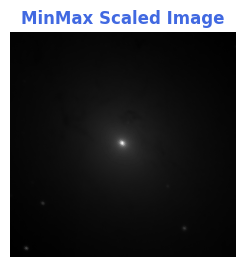

<Figure size 640x480 with 0 Axes>

In [28]:
minmax_array = minmax_scaling(M31_Pixels)
compare_pixels(minmax_array, 'MinMax Scaled Image')

##### As we can see there is not much of a difference between the original and the scaled image...

### Standardization or Z Scaling

In [29]:
# a fuction to standardize
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

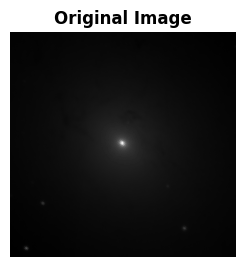

<Figure size 640x480 with 0 Axes>

In [30]:
zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array, title = 'Z Scaled image')

##### Again as we can see there is not much of a difference between the original and the scaled image

### Square Root Scaling

In [31]:
# a function for sqrt scaling
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

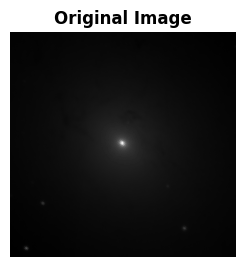

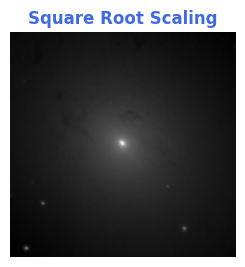

<Figure size 640x480 with 0 Axes>

In [32]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array, 'Square Root Scaling')

### Log Normalization

In [33]:
# function for log normalization
def log_normalization(pixel_array):
  return np.log(pixel_array)

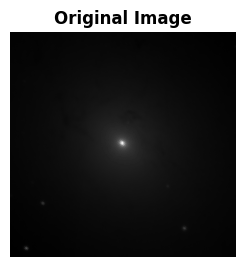

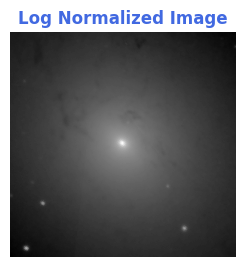

<Figure size 640x480 with 0 Axes>

In [34]:
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, 'Log Normalized Image')

In [35]:
# creating a histogram distribution of pixels values after log normalization
plt.hist(log_norm_array.flat, bins = 300,)
plt.show()

# as we can see the pixel values are now more evenly distributed

### ZScaleInterval

In [36]:
from astropy.visualization import ZScaleInterval

In [37]:
z = ZScaleInterval()
z1, z2 = z.get_limits(log_norm_array)

print(f'Minimun value {np.min(log_norm_array)}')
print(f'Minimun vlaue after applying the ZScaleInterval: {z1}\n')
print(f'Maximun value {np.max(log_norm_array)}')
print(f'Maximun vlaue after applying the ZScaleInterval: {z2}')

'''
After applying ZScaleInterval, all values less than 1.6889997720718384
will be converted to 1.6889997720718384 and all values greater than
4.447910199027213 will be converted to 4.447910199027213
'''

Minimun value 1.678847312927246
Minimun vlaue after applying the ZScaleInterval: 1.6889997720718384

Maximun value 5.181783676147461
Maximun vlaue after applying the ZScaleInterval: 4.447910199027213


'\nAfter applying ZScaleInterval, all values less than 1.6889997720718384\nwill be converted to 1.6889997720718384 and all values greater than\n4.447910199027213 will be converted to 4.447910199027213\n'

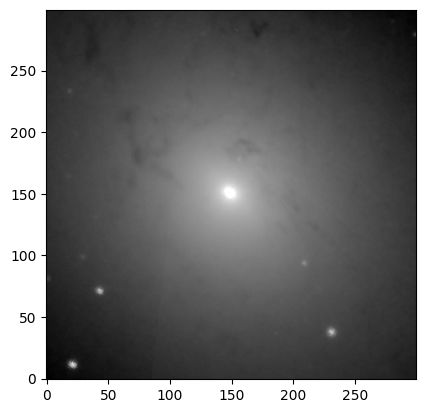

In [38]:
# plotting the M31 data using the clipped interval
img = plt.imshow(log_norm_array,
                 vmin = z1,
                 vmax = z2,
                 cmap = 'gray',
                 origin = 'lower')
plt.show()

In [39]:
# getting the 8-bit form of the above image
image_array = img.make_image(renderer = None, unsampled = True)[0]

In [40]:
image_array.shape

# red, green, blue and alpha channels makes up a 4 channel image

(300, 300, 4)

In [41]:
# converting the 4 channel image to grayscale
import cv2
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [42]:
gray_array.shape

(300, 300)

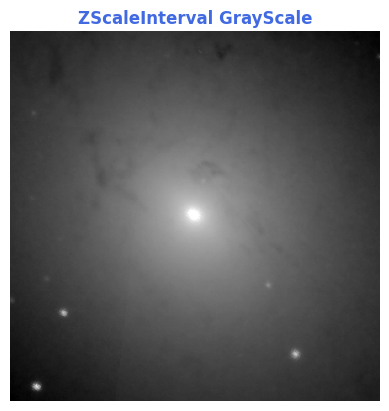

In [43]:
plot_pixels(gray_array, 'ZScaleInterval GrayScale', 'royalblue')

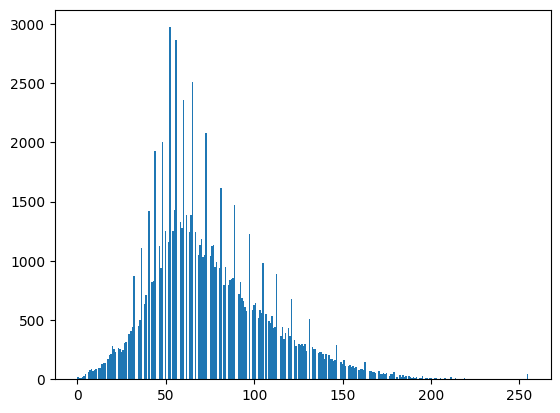

In [44]:
# histogram visualization
plt.hist(gray_array.flat, bins = 300)
plt.show()

In [45]:
grayscale_zint_array = gray_array

### Gaussian Denoising

In [46]:
# importing the convolutional 2D filter
from scipy.signal import convolve2d

In [47]:
# generating a simple kernal
kernel = np.ones((3,3))/9

In [48]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [49]:
# generating a gaussian kernal
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

'''
the central part has the maximum value present,
as we move towards the edges the values get smaller
'''

'\nthe central part has the maximum value present,\nas we move towards the edges the values get smaller\n'

In [50]:
# convolution using the simple kernel
convolved_image = convolve2d(M31_Pixels, kernel, mode = 'same') # mode = padding

In [51]:
# convolution using the gaussian kernel
gaussian_convolved_image = convolve2d(M31_Pixels, gaussian_kernel, mode = 'same')

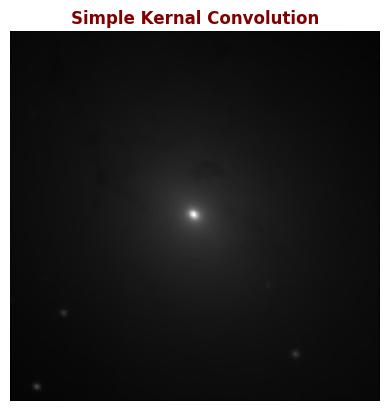

In [52]:
plot_pixels(convolved_image, 'Simple Kernal Convolution', color = 'maroon')

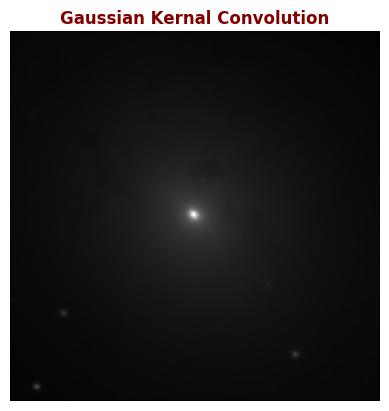

In [53]:
plot_pixels(gaussian_convolved_image, 'Gaussian Kernal Convolution', color = 'maroon')

As such we not able to see any such difference

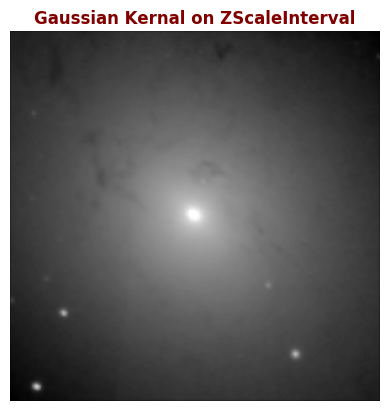

In [54]:
# using grayscale of M31 data to convolve with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode = 'same')

# plotting
plot_pixels(convolved_grayscale, 'Gaussian Kernal on ZScaleInterval', color = 'maroon')

In [55]:
# creating a histogram
plt.hist(convolved_grayscale.flat, bins = 300)
plt.show()

### Enhancing the Linear Features on M31

In [56]:
from skimage.filters import meijering, sato

In [57]:
SPECTRAL_LIST = ['gray', 'jet', 'prism', 'nipy_spectral']

In [58]:
# implementing meijering and sato filters on the convolved image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

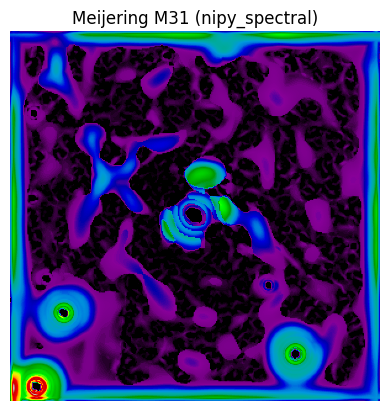

In [59]:
# for each element in the spectral list, we visualize the output for the meijering filter
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap = colormap, origin = 'lower')
  plt.title(f'Meijering M31 ({colormap})')
  plt.axis('off')
  plt.show()

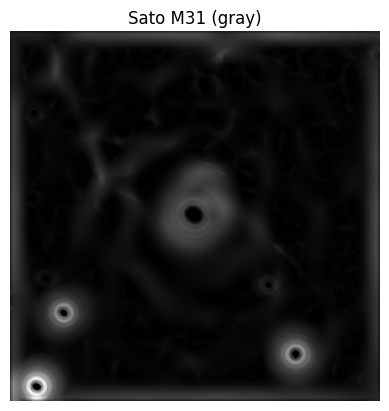

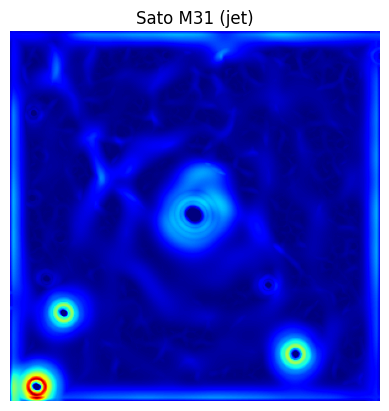

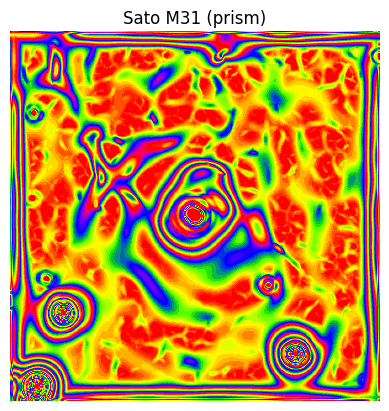

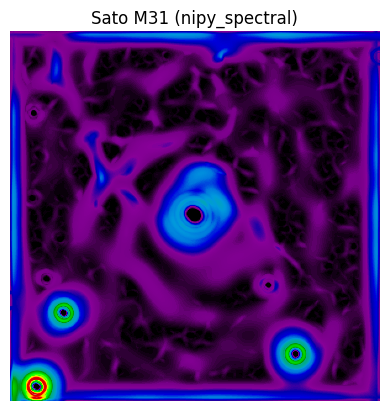

In [60]:
# for each element in the spectral list, we visualize the output for the sato filter
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap = colormap, origin = 'lower')
  plt.title(f'Sato M31 ({colormap})')
  plt.axis('off')
  plt.show()

### Feature Detection and Extraction

In [61]:
from skimage.feature import corner_foerstner

In [62]:
feature_output = corner_foerstner(convolved_grayscale)

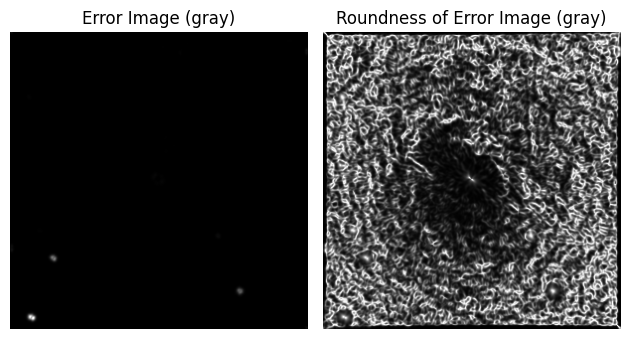

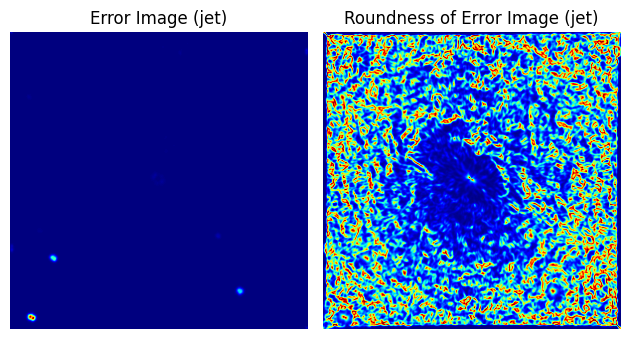

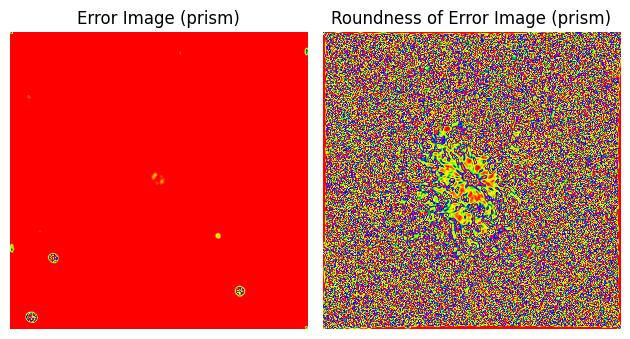

In [63]:
# subplot visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0],
             cmap = colormap,
             origin = 'lower')
  plt.title(f'Error Image ({colormap})')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1],
             cmap = colormap,
             origin = 'lower')
  plt.title(f'Roundness of Error Image ({colormap})')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

### multiscale_basic_features

In [64]:
from skimage.feature import multiscale_basic_features

In [65]:
featured_image = multiscale_basic_features(convolved_grayscale)

In [66]:
print(f'Type: {type(featured_image)}')
print(f'Shape: {featured_image.shape}')

Type: <class 'numpy.ndarray'>
Shape: (300, 300, 24)


In [67]:
# storing each and every channel from P1 to P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

In [68]:
# creating a list of pixels for each channel
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

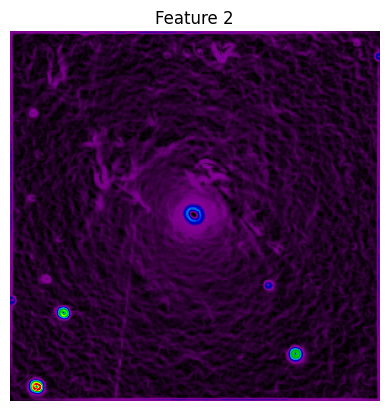

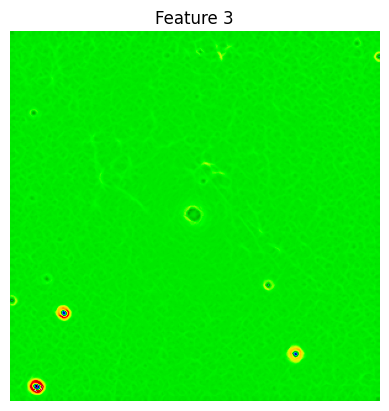

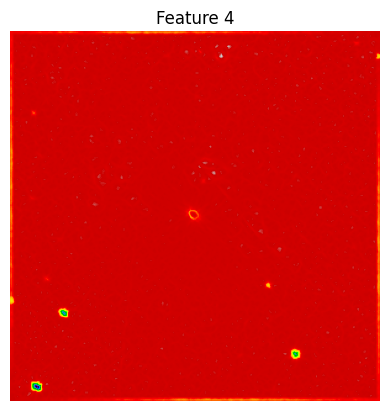

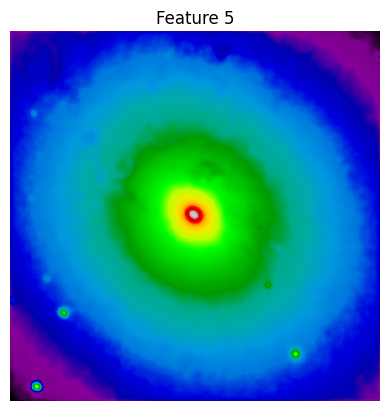

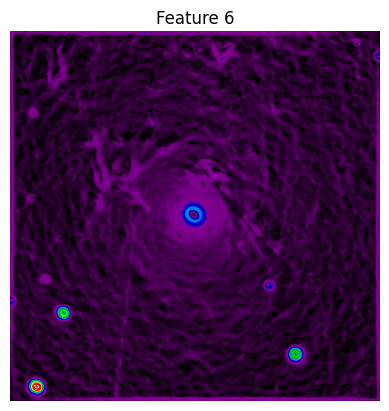

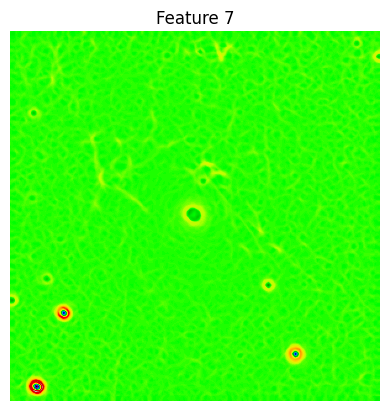

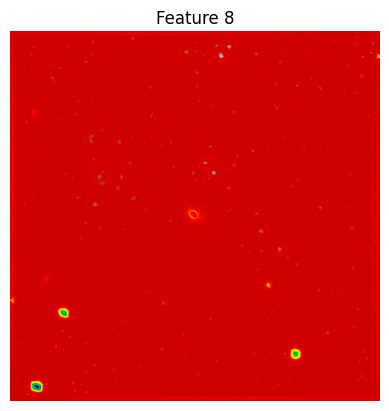

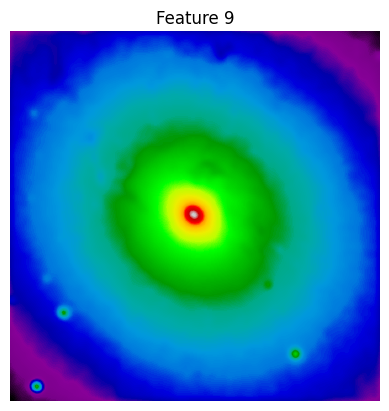

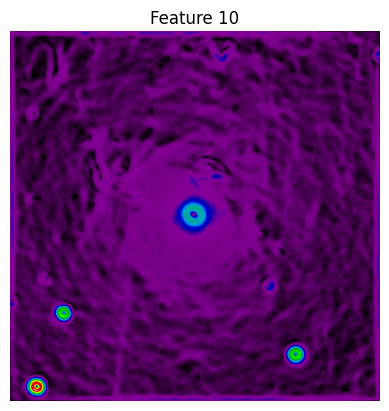

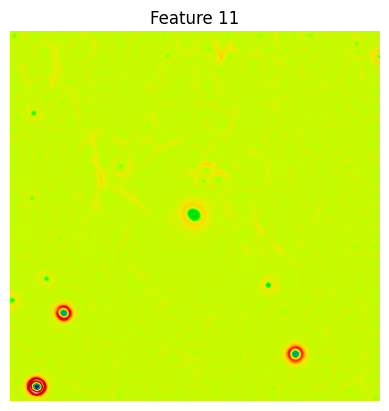

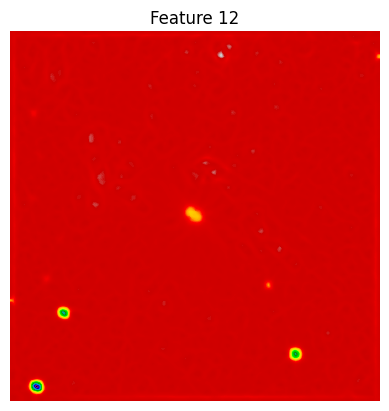

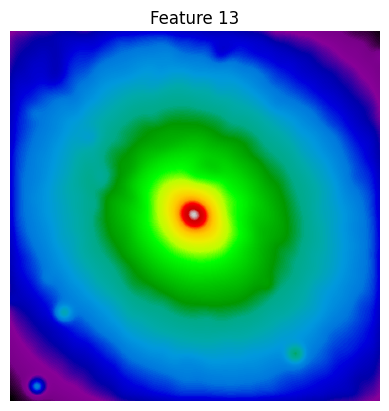

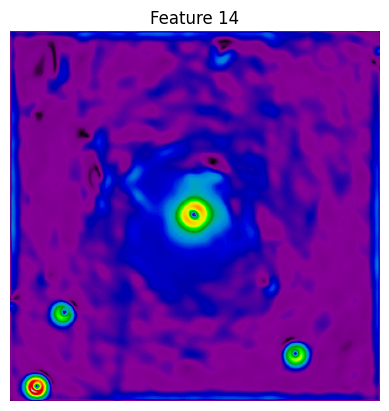

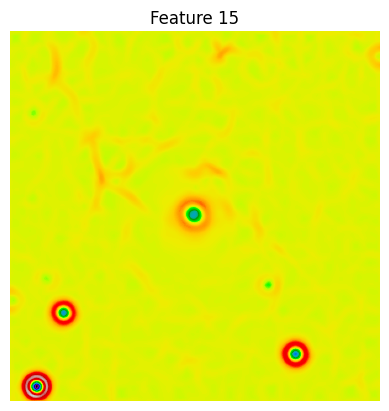

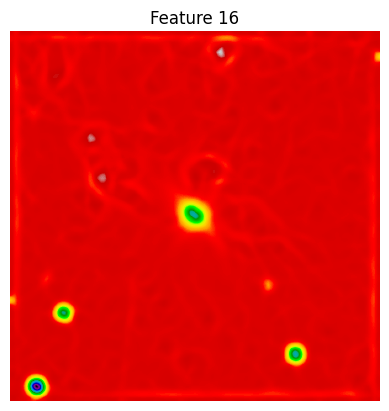

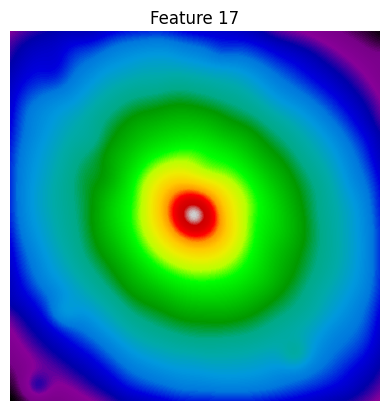

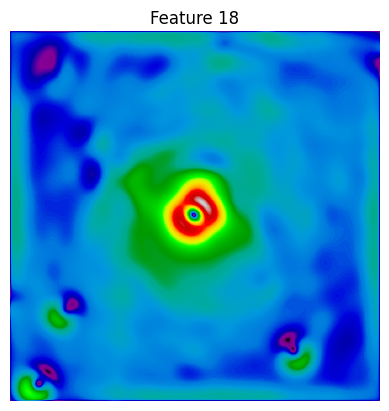

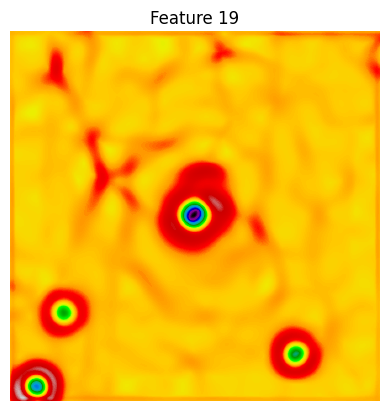

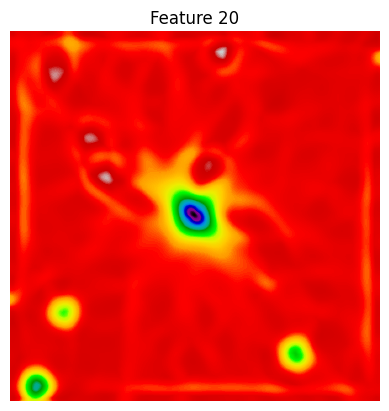

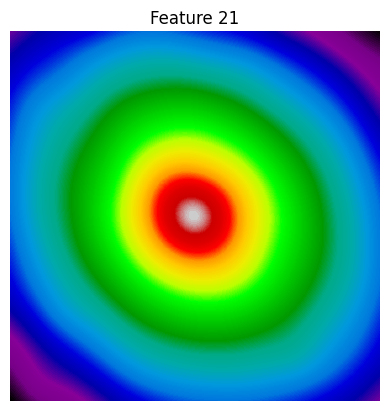

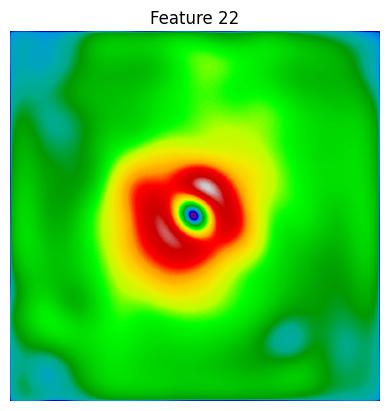

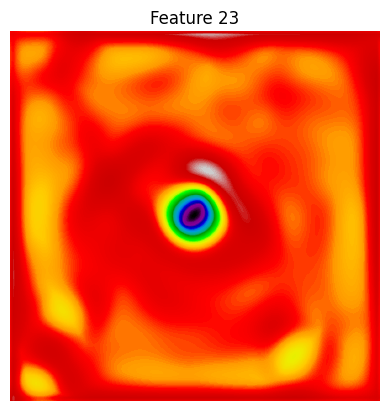

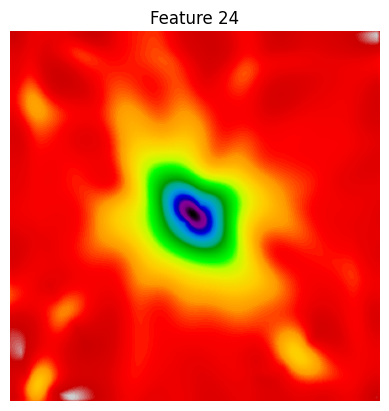

In [69]:
# visualizing each channel using prism spectral
for i, feature in enumerate(Pixels):
  plt.imshow(feature, cmap = 'nipy_spectral', origin = 'lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()